In [1]:
# !git clone https://bitbucket.org/jadslim/german-traffic-signs
# !ls german-traffic-sign
# !pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2

from keras.callbacks import LearningRateScheduler, ModelCheckpoint

%matplotlib inline

Using TensorFlow backend.


In [3]:
np.random.seed(0)
# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

    
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [4]:
#already 4 dimensional
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '0 - Speed limit (20km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '1 - Speed limit (30km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '2 - Speed limit (50km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '3 - Speed limit (60km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '4 - Speed limit (70km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '5 - Speed limit (80km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '6 - End of speed limit (80km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '7 - Speed limit (100km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '8 - Speed limit (120km/h)')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '9 - No passing')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '10 - No passing for vechiles over 3.5 metric tons')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '11 - Right-of-way at the next intersection')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '12 - Priority road')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '13 - Yield')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '14 - Stop')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '15 - No vechiles')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '16 - Vechiles over 3.5 metric tons prohibited')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '17 - No entry')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '18 - General caution')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '19 - Dangerous curve to the left')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '20 - Dangerous curve to the right')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '21 - Double curve')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '22 - Bumpy road')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '23 - Slippery road')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '24 - Road narrows on the right')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '25 - Road work')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '26 - Traffic signals')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '27 - Pedestrians')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '28 - Children crossing')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '29 - Bicycles crossing')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '30 - Beware of ice/snow')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '31 - Wild animals crossing')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '32 - End of all speed and passing limits')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '33 - Turn right ahead')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '34 - Turn left ahead')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '35 - Ahead only')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '36 - Go straight or right')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '37 - Go straight or left')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '38 - Keep right')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '39 - Keep left')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '40 - Roundabout mandatory')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '41 - End of no passing')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, '42 - End of no passing by vechiles over 3.5 metric tons')

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


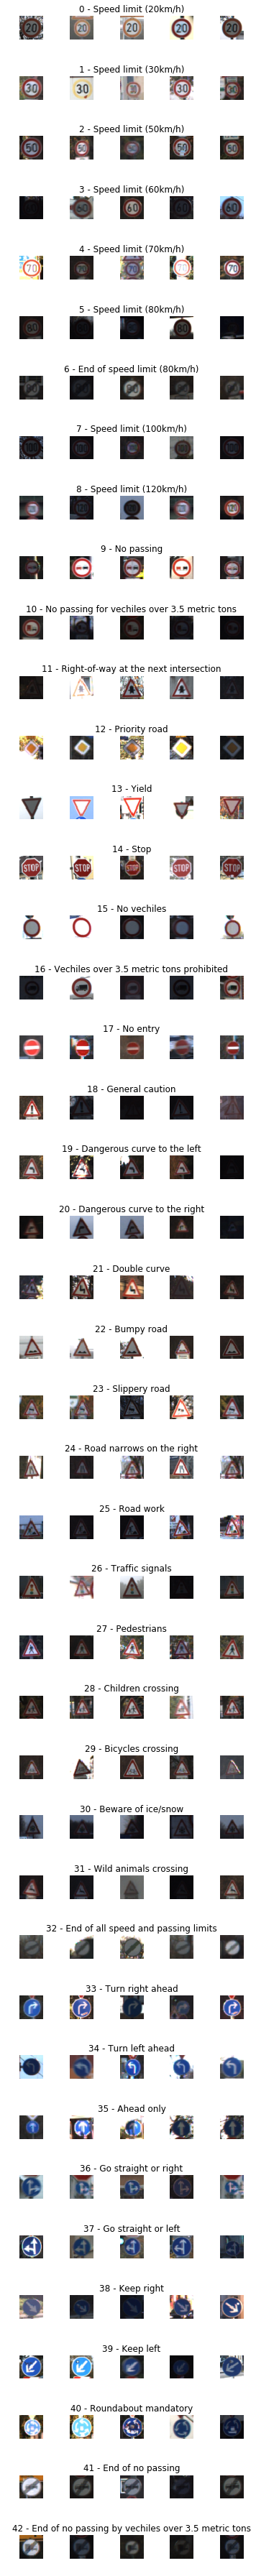

In [5]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))
print(num_of_samples)

<Figure size 864x288 with 0 Axes>

<BarContainer object of 43 artists>

Text(0.5, 1.0, 'Distribution of the train dataset')

Text(0.5, 0, 'Class number')

Text(0, 0.5, 'Number of images')

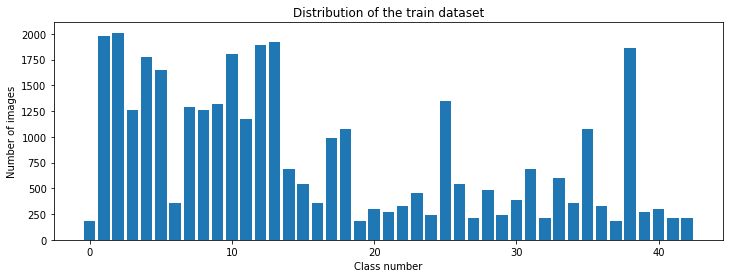

In [6]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(-0.5, 31.5, 31.5, -0.5)

(32, 32, 3)
36


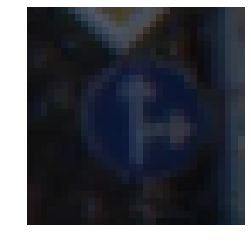

In [7]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(-0.5, 31.5, 31.5, -0.5)

(32, 32)


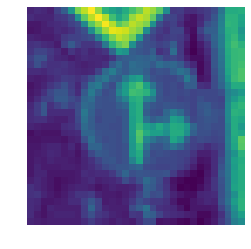

In [8]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(-0.5, 31.5, 31.5, -0.5)

(32, 32)


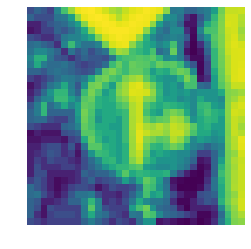

In [9]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [10]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

(-0.5, 31.5, 31.5, -0.5)

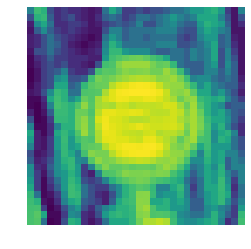

In [11]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')

In [12]:
print(X_train.shape)
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

(34799, 32, 32)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(15, 32, 32, 1)


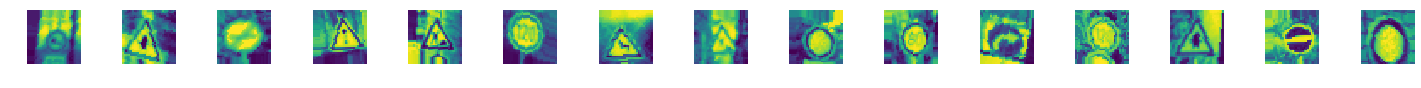

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)
# for X_batch, y_batch in

batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [14]:
# create model
def modified_model():
  model = Sequential()
  model.add(Conv2D(80, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(80, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(60, (3, 3), activation='relu'))
  model.add(Conv2D(60, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [15]:
model = modified_model()
print(model.summary())

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 80)        2080      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 80)        160080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 60)        43260     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 60)          32460     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 60)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0         
__________

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'epoch')

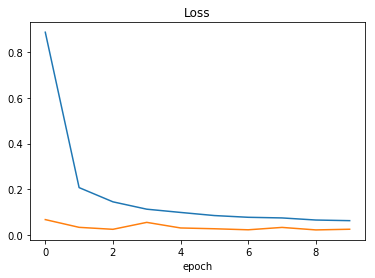

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'epoch')

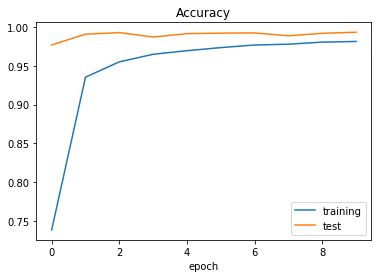

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [18]:
# TODO: Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.10004597903386314
Test accuracy: 0.9777513856370583


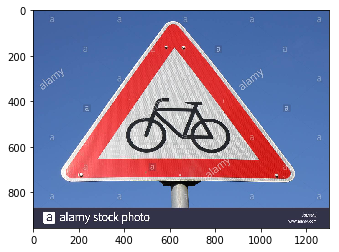

In [19]:
#predict internet number
import requests
from PIL import Image
url1 = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
url2 = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
url3 = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
url4 = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
url5 = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
url6 = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url6, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)
1/1 [==============================] - 0s
predicted sign: [19]


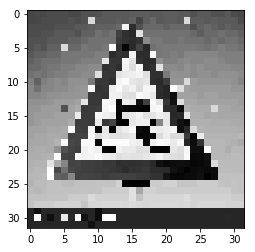

In [20]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
 
print("predicted sign: "+ str(model.predict_classes(img)))